# Transforms

data does not always com in its final processed form taht is required for training machine learning algorithms. We use transforms to perform some manipulations of the data and make it suitable for training.

All TorchVision datasets have two parameters - `transform` to modify features and `target_transform` to modify the labels - that accept callables containing the transformation logic. The `torchvision.transforms` module offers several commonly-used transforms oout of the box.

The FashinMNIST features are PIL image format, and the labels are integers. For training, we need the features as normalized tensors, and labels as one-hot encoded tensors. To make these transformations, we use `ToTensor` and `Lambda`.

In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(
        lambda y: torch.zeros(
            10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## `ToTensor()`

`ToTensor` converts a PIL image or NumPy `ndarray` into `FloatTensor` and scales the image's pixel intensity values in the range `[0., 1.]`.

## Lambda transformations

`Lambda` transforms apply any user-defined lambda function. Here, we define a function to turn integer into a one-hot encoded tensor. It first creates a zero tensor of size 10(the number of labels in our dataset) and calls `scatter_` which assigns a `value=1` on the index as given by the label y.

```python
target_transform=Lambda(
        lambda y: torch.zeros(
            10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
```

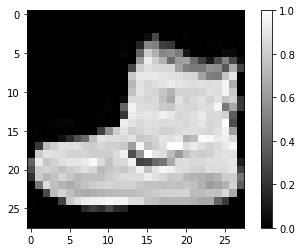

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


In [15]:
import matplotlib.pyplot as plt
img, label = ds.__getitem__(0)

plt.imshow(img.permute(1,2,0), cmap="gray")
plt.colorbar()
plt.show()

print(label)